In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import GridSearchCV
import numpy as np



In [56]:
# Dataset Preparation

data = pd.read_csv("weather_data.csv")
data = data.drop(["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"], axis=1)
data["RainTomorrow"] = data["RainTomorrow"].replace(to_replace="NA", value="")
data["year"] = data["Date"].apply(lambda x: x[0])
data["month"] = data["Date"].apply(lambda x: x[1])

data["MinTemp"] = data["MinTemp"].fillna(method="ffill")
data["MaxTemp"] = data["MaxTemp"].fillna(method="ffill")
data["Rainfall"] = data["Rainfall"].fillna(method="ffill")
data["WindGustSpeed"] = data["WindGustSpeed"].fillna(method="ffill")
data["WindSpeed9am"] = data["WindSpeed9am"].fillna(method="ffill")
data["WindSpeed3pm"] = data["WindSpeed3pm"].fillna(method="ffill")
data["Humidity9am"] = data["Humidity9am"].fillna(method="ffill")
data["Humidity3pm"] = data["Humidity3pm"].fillna(method="ffill")
data["Pressure9am"] = data["Pressure9am"].fillna(method="ffill")
data["Pressure3pm"] = data["Pressure3pm"].fillna(method="ffill")
data["Temp9am"] = data["Temp9am"].fillna(method="ffill")
data["Temp3pm"] = data["Temp3pm"].fillna(method="ffill")
data["RainTomorrow"] = data["RainTomorrow"].fillna(method="ffill")
data = data.drop("Date", axis=1)

l = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "year", "month"]
le = LabelEncoder()

data[l] = data[l].apply(le.fit_transform)


In [57]:
# df['Date'] = pd.to_datetime(df['Date'])
# the = data.Date[0]
# l = the.split("-")
# print(l)

# data["the_date"], data["year"], data["month"] = data["Date"].apply(lambda x: x.split("-"))
# print(type(data["Date"][0][0]))

print(data.info())







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int32  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   WindGustDir    145460 non-null  int32  
 5   WindGustSpeed  145460 non-null  float64
 6   WindDir9am     145460 non-null  int32  
 7   WindDir3pm     145460 non-null  int32  
 8   WindSpeed9am   145460 non-null  float64
 9   WindSpeed3pm   145460 non-null  float64
 10  Humidity9am    145460 non-null  float64
 11  Humidity3pm    145460 non-null  float64
 12  Pressure9am    145460 non-null  float64
 13  Pressure3pm    145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainToday      145460 non-null  int32  
 17  RainTomorrow   145460 non-nul

In [38]:
data["MinTemp"] = data["MinTemp"].fillna(method="ffill")
data["MaxTemp"] = data["MaxTemp"].fillna(method="ffill")
data["Rainfall"] = data["Rainfall"].fillna(method="ffill")
data["WindGustSpeed"] = data["WindGustSpeed"].fillna(method="ffill")
data["WindSpeed9am"] = data["WindSpeed9am"].fillna(method="ffill")
data["WindSpeed3pm"] = data["WindSpeed3pm"].fillna(method="ffill")
data["Humidity9am"] = data["Humidity9am"].fillna(method="ffill")
data["Humidity3pm"] = data["Humidity3pm"].fillna(method="ffill")
data["Pressure9am"] = data["Pressure9am"].fillna(method="ffill")
data["Pressure3pm"] = data["Pressure3pm"].fillna(method="ffill")
data["Temp9am"] = data["Temp9am"].fillna(method="ffill")
data["Temp3pm"] = data["Temp3pm"].fillna(method="ffill")
# data["RainTomorrow"] = data["RainTomorrow"].fillna(method="ffill")

data = data.drop("Date", axis=1)

print(data.info())
print(data["RainTomorrow"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int32  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   WindGustDir    145460 non-null  int32  
 5   WindGustSpeed  145460 non-null  float64
 6   WindDir9am     145460 non-null  int32  
 7   WindDir3pm     145460 non-null  int32  
 8   WindSpeed9am   145460 non-null  float64
 9   WindSpeed3pm   145460 non-null  float64
 10  Humidity9am    145460 non-null  float64
 11  Humidity3pm    145460 non-null  float64
 12  Pressure9am    145460 non-null  float64
 13  Pressure3pm    145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainToday      145460 non-null  int32  
 17  RainTomorrow   145460 non-nul

In [5]:
le = LabelEncoder()

l = ["year", "month"]
data[l] = data[l].apply(le.fit_transform)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int32  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   WindGustDir    145460 non-null  int32  
 5   WindGustSpeed  145460 non-null  float64
 6   WindDir9am     145460 non-null  int32  
 7   WindDir3pm     145460 non-null  int32  
 8   WindSpeed9am   145460 non-null  float64
 9   WindSpeed3pm   145460 non-null  float64
 10  Humidity9am    145460 non-null  float64
 11  Humidity3pm    145460 non-null  float64
 12  Pressure9am    145460 non-null  float64
 13  Pressure3pm    145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainToday      145460 non-null  int32  
 17  RainTomorrow   145460 non-nul

In [48]:
Y = data["RainTomorrow"]
X = data.drop("RainTomorrow", axis=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.23)

In [50]:
rf = RandomForestClassifier(n_estimators=800, max_features="log2", max_depth=30, min_samples_split=2, min_samples_leaf=1, )
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=800)

In [51]:
print("The training accuracy is ", rf.score(X_train, y_train)*100, "%")

The training accuracy is  99.99732152423128 %


In [58]:
out = rf.predict(X_test)
print("Testing accuracy is ", accuracy_score(y_test, out)*100, "%")

Testing accuracy is  85.41666666666666 %


In [54]:
import pickle
filename = "correct_model_all_params.pickle"
pickle.dump(rf, open(filename, "wb"))

In [19]:
param_grid = {
  
    'n_estimators': [100, 200, 300, 1000]
}
grid_search = GridSearchCV(estimator = rf , param_grid = param_grid, cv = 3, n_jobs = -1)


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
# This is the gridsearch can't run on this laptop
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

In [28]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'min_samples_leaf', 
                                param_range = min_samples_leaf, cv = 3)

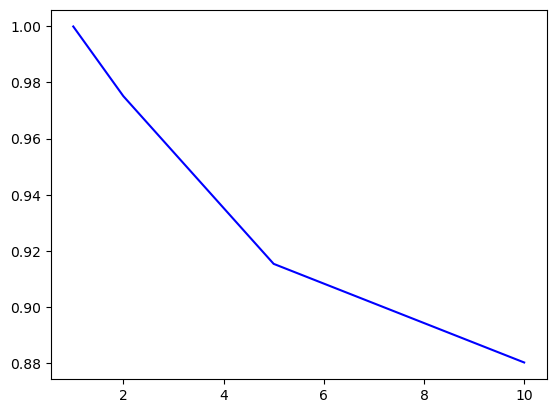

In [29]:
mean_train_score = np.mean(train_scoreNum, axis=1)
plt.plot(min_samples_leaf, mean_train_score,
         label="Training Score", color='b')

In [12]:
# Model with no hyper params
rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
print("The training accuracy is ", rf.score(X_train, y_train)*100, "%")
out = rf.predict(X_test)
print("Testing accuracy is ", accuracy_score(y_test, out)*100, "%")

The training accuracy is  99.99375022320632 %
Testing accuracy is  84.41535150645623 %


Accuracy: 0.8541666666666666
Precision: 0.7586481113320079
Recall: 0.5100922336586018


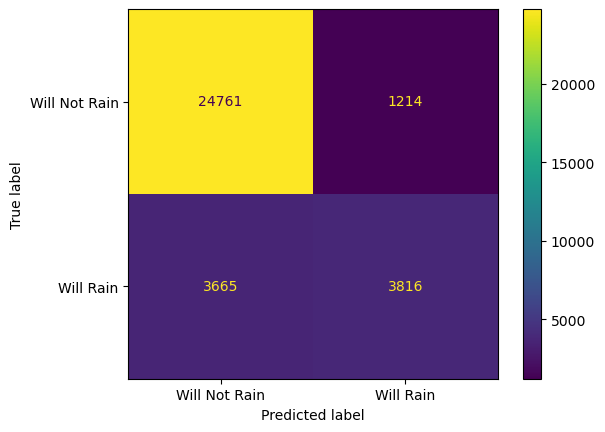

In [61]:
# Confusion matrix
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, out)
precision = precision_score(y_test, out)
recall = recall_score(y_test, out)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

confusion_matrix = metrics.confusion_matrix(y_test, out)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = ["Will Not Rain", "Will Rain"]).plot()
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# cm_display.plot()
# plt.show()